In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Modules
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

from scipy.stats import norm

In [3]:
# The path to our CSV file
#file = "..\Disney_Datasets\disney_movies_total_gross.csv"
moviedf = pd.read_csv(r"C:\Users\halcm\Desktop\KU-Project-1\Disney_Datasets\disney_movies_total_gross_2016.csv",encoding='cp1252')
revenuedf = pd.read_csv(r"C:\Users\halcm\Desktop\KU-Project-1\Disney_Datasets\disney_revenue_1991-2017.csv", encoding='cp1252')

# Read our Kickstarter data into pandas
moviedf.head()

#If data corrupts, consider writing to new csv file from jupyter

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [4]:
revenue_df = pd.read_csv(r"C:\Users\halcm\Desktop\KU-Project-1\Disney_Datasets\disney_revenue_1991-2017.csv", encoding='cp1252')
revenue_df.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [5]:
revenue_df=revenue_df.rename(columns = {'Studio Entertainment[NI 1]':'Studio Entertainment', 'Disney Consumer Products[NI 2]':'Consumer Products',
                                       'Disney Interactive[NI 3][Rev 1]':'Disney Interactive', 'Walt Disney Parks and Resorts':'Parks and Resorts',
                                       'Disney Media Networks':'Media Networks'})
revenue_df.head()

,Year,Studio Entertainment,Consumer Products,Disney Interactive,Parks and Resorts,Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [25]:
revenue_df = revenue_df.replace(np.nan, 0)
revenue_df = revenue_df.replace({"4,142": "4142"})
pd.to_numeric(revenue_df['Media Networks'])
pd.options.display.float_format = '{:,.1f}'.format
revenue_df.head()

,Year,Studio Entertainment,Consumer Products,Disney Interactive,Parks and Resorts,Media Networks,Total
0,1991,"2,593.0",724.0,0.0,"2,794.0",0,6111
1,1992,"3,115.0","1,081.0",0.0,"3,306.0",0,7502
2,1993,"3,673.4","1,415.1",0.0,"3,440.7",0,8529
3,1994,"4,793.0","1,798.2",0.0,"3,463.6",359,10414
4,1995,"6,001.5","2,150.0",0.0,"3,959.8",414,12525


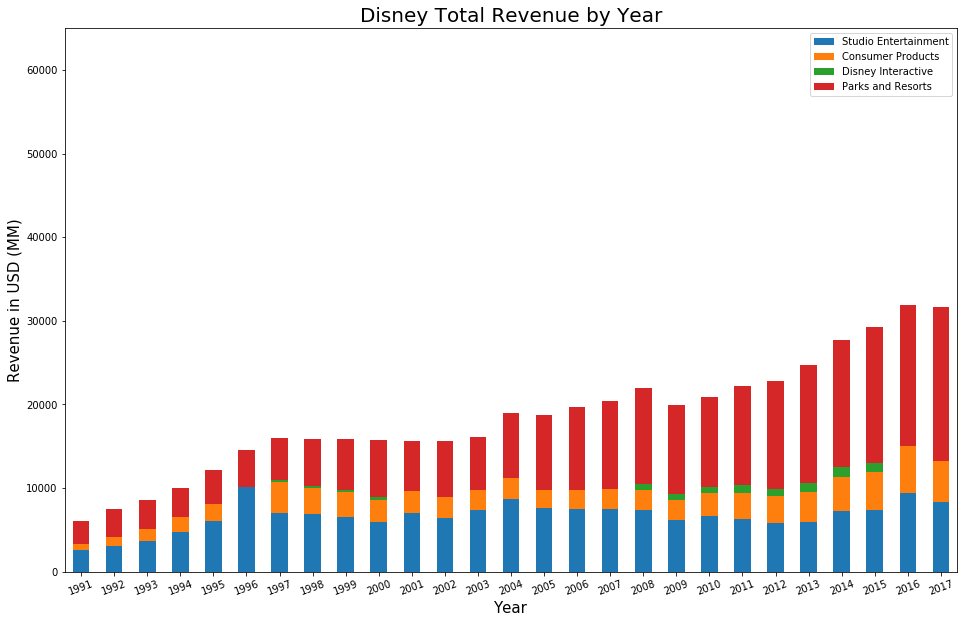

In [7]:
revenue_df.loc[:,['Studio Entertainment', 'Consumer Products', 'Disney Interactive', 'Parks and Resorts', 'Media Networks']].plot.bar(stacked=True, figsize=(16,10))

plt.xticks(np.arange(27), ('1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', 
                       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', 
                       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'), rotation=20)



# Give our chart some labels and a tile
plt.title("Disney Total Revenue by Year",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Revenue in USD (MM)",fontsize=15)
plt.ylim([0, 65000])

plt.savefig('TotalRevenue.pdf')

In [8]:
# Extract "Year", "Total"
reduced_rev_df = revenue_df.loc[:, ["Year", "Total"]]
reduced_rev_df.head()

,Year,Total
0,1991,6111
1,1992,7502
2,1993,8529
3,1994,10414
4,1995,12525


In [9]:
reduced_rev_df['Diff'] = reduced_rev_df['Total'] - reduced_rev_df['Total'].shift(1)
reduced_rev_df.head()

,Year,Total,Diff
0,1991,6111,nan
1,1992,7502,"1,391.0"
2,1993,8529,"1,027.0"
3,1994,10414,"1,885.0"
4,1995,12525,"2,111.0"


In [10]:
reduced_rev_df.describe()

,Year,Total,Diff
count,27.0,27.0,26.0
mean,"2,004.0","30,410.7","1,885.6"
std,7.9,"14,449.1","1,651.4"
min,"1,991.0","6,111.0","-1,694.0"
25%,"1,997.5","22,724.5","1,068.2"
50%,"2,004.0","30,752.0","1,899.5"
75%,"2,010.5","39,478.0","2,813.2"
max,"2,017.0","55,632.0","6,214.0"


In [11]:
# Calculate the average total revenue for all years
reduced_rev_df["Total"].mean()

30410.703703703704

In [12]:
# Create an array that contains the revenue for the year before, year of, and year after the acquisition
revenue1 = [36149000.00, 38063000.00, 40893000.00]
x_axis = np.arange(len(revenue1))

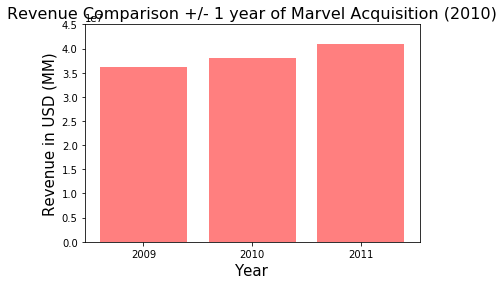

In [13]:
plt.bar(x_axis, revenue1, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2009", "2010", "2011"])
plt.ylim([0.0, 45000000.00])

# Give our chart some labels and a tile
plt.title("Revenue Comparison +/- 1 year of Marvel Acquisition (2010)",fontsize=16)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Revenue in USD (MM)",fontsize=15)

plt.savefig('Marvel.pdf')

In [14]:
# Create an array that contains the revenue for the year before, year of, and year after the acquisition
revenue2 = [42278000.00, 45041000.00, 48813000.00]
x_axis = np.arange(len(revenue2))

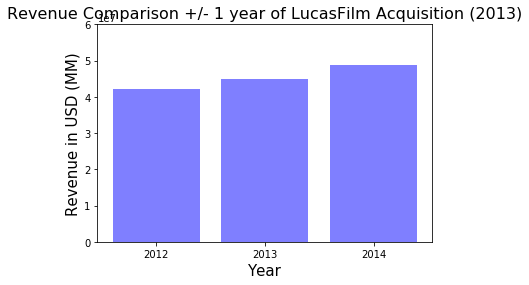

In [15]:
plt.bar(x_axis, revenue2, color='b', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2012", "2013", "2014"])
plt.ylim([0.0, 60000000.00])

# Give our chart some labels and a tile
plt.title("Revenue Comparison +/- 1 year of LucasFilm Acquisition (2013)",fontsize=16)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Revenue in USD (MM)", fontsize=15)

plt.savefig('LucasFilm.pdf')

In [16]:
stdev = reduced_rev_df["Diff"].std()
stdev

1651.391245633162

In [17]:
mean = np.mean(reduced_rev_df["Diff"])
mean

1885.6153846153845

In [18]:
reduced_rev_df["Z Score"] = (reduced_rev_df["Diff"] - mean) / stdev

In [19]:
z_scores = [(y - mean) / stdev for y in reduced_rev_df["Diff"]]

In [20]:
reduced_rev_df.head()

,Year,Total,Diff,Z Score
0,1991,6111,nan,nan
1,1992,7502,"1,391.0",-0.3
2,1993,8529,"1,027.0",-0.5
3,1994,10414,"1,885.0",-0.0
4,1995,12525,"2,111.0",0.1


In [21]:
np.where(np.abs(reduced_rev_df["Z Score"])> 1)

(array([ 5,  6, 11, 13, 18, 23, 24, 26], dtype=int64),)

In [22]:
#Z Score indicates how far away a data point is from the mean.  
#The higher the score, the farther away the data point is from the average.
#A score of 1 indicates the data point is one standard deviation away from the mean.

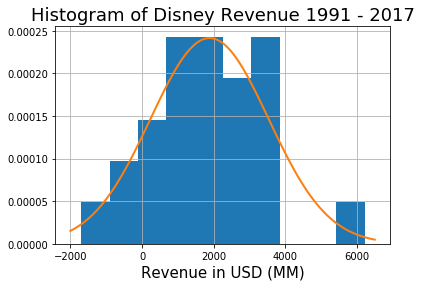

In [23]:
reduced_rev_df.hist(column='Diff', normed=True)

x = np.linspace(-2000,6500,100)
y = norm.pdf(x, loc=mean, scale=stdev)   
pl.plot(x,y, linewidth=2.0)

plt.title("Histogram of Disney Revenue 1991 - 2017", fontsize=18)
plt.xlabel("Revenue in USD (MM)",fontsize=15)
#plt.ylabel("Frequency",fontsize=15)

plt.savefig('Histogram.pdf')

In [24]:
reduced_rev_df[np.abs(reduced_rev_df["Z Score"])>1]

,Year,Total,Diff,Z Score
5,1996,18739,"6,214.0",2.6
6,1997,22473,"3,734.0",1.1
11,2002,25360,-430.0,-1.4
13,2004,30752,"3,691.0",1.1
18,2009,36149,"-1,694.0",-2.2
23,2014,48813,"3,772.0",1.1
24,2015,52465,"3,652.0",1.1
26,2017,55137,-495.0,-1.4
